In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('./pet_after_preprocessing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mission_id       718 non-null    object 
 1   breed            718 non-null    object 
 2   age              718 non-null    float64
 3   weight           718 non-null    float64
 4   shoulder_height  718 non-null    float64
 5   neck_size        718 non-null    float64
 6   back_length      718 non-null    float64
 7   chest_size       718 non-null    float64
 8   sex              718 non-null    object 
 9   exercise         718 non-null    int64  
 10  BCS              718 non-null    int64  
 11  day_food_amount  718 non-null    float64
 12  over_weight      718 non-null    float64
 13  RER              718 non-null    float64
 14  DER              718 non-null    float64
 15  day_cal          718 non-null    float64
 16  cal_diff         718 non-null    float64
dtypes: float64(12), 

In [4]:
data

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER,day_cal,cal_diff
0,10_000077,ETC,4.0,11.00,30.0,31.00,50.00,49.0,IM,3,5,2.020,0.000000,422.807375,845.614750,606.0,-239.614750
1,10_000078,ETC,2.0,9.60,35.0,32.00,30.00,50.0,SF,1,5,4.020,0.000000,381.769707,763.539414,1206.0,442.460586
2,10_000083,DRI,12.0,3.50,22.0,20.00,30.00,32.0,IF,1,5,4.800,0.000000,179.122059,214.946471,1440.0,1225.053529
3,10_000084,ETC,4.0,5.75,33.0,20.99,33.99,40.0,SF,3,4,2.400,-0.638889,259.925521,519.851042,720.0,200.148958
4,10_000085,POO,16.0,3.59,23.0,22.00,24.00,35.0,IF,3,5,1.690,0.000000,182.565570,365.131139,507.0,141.868861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,20_000009,RUS,4.0,7.08,20.0,19.00,44.00,44.0,CM,1,9,1.406,2.022857,303.824634,607.649268,421.8,-185.849268
714,20_000016,KOR,7.0,5.00,22.0,19.00,37.00,40.0,CM,2,7,4.400,0.833333,234.059107,468.118213,1320.0,851.881787
715,20_000019,SIA,7.0,3.80,24.0,22.00,22.00,35.0,SF,1,6,4.000,0.345455,190.517879,381.035758,1200.0,818.964242
716,20_000023,KOR,8.0,6.15,25.0,23.00,30.00,42.0,CM,1,7,3.200,1.025000,273.372218,328.046662,960.0,631.953338


In [6]:
data.columns

Index(['mission_id', 'breed', 'age', 'weight', 'shoulder_height', 'neck_size',
       'back_length', 'chest_size', 'sex', 'exercise', 'BCS',
       'day_food_amount', 'over_weight', 'RER', 'DER', 'day_cal', 'cal_diff'],
      dtype='object')

In [8]:
# 품종 시츄만 뽑기
df = data.loc[data['breed'] == 'DRI']

In [9]:
df.over_weight.describe()

count    38.000000
mean      0.181208
std       0.539583
min      -1.500000
25%       0.000000
50%       0.000000
75%       0.590909
max       1.465000
Name: over_weight, dtype: float64

# 클러스터링 도전

In [21]:
X = df[['age', 'weight', 'shoulder_height', 'neck_size',
        'back_length', 'chest_size', 'exercise', 'BCS',
        'day_cal', 'cal_diff']]

In [22]:
Scaler = MinMaxScaler()

In [23]:
data_scale = Scaler.fit_transform(X)

In [14]:
data_scale

array([[0.61111111, 0.0619469 , 0.23529412, 0.07692308, 0.44444444,
        0.23076923, 0.        , 0.6       , 0.51749095, 0.63722841],
       [0.22222222, 0.22123894, 0.58823529, 0.30769231, 0.44444444,
        0.38461538, 0.5       , 0.6       , 0.46924005, 0.50138397],
       [0.61111111, 0.32743363, 0.41176471, 0.34615385, 0.38888889,
        0.5       , 0.        , 0.6       , 0.14234017, 0.22648838],
       [0.05555556, 0.        , 0.23529412, 0.30769231, 0.44444444,
        0.11538462, 1.        , 0.6       , 0.17973462, 0.24410582],
       [0.72222222, 0.0619469 , 0.64705882, 0.07692308, 0.38888889,
        0.53846154, 0.        , 0.        , 0.05958987, 0.16897404],
       [0.55555556, 0.7699115 , 0.41176471, 0.26923077, 0.55555556,
        0.73076923, 0.5       , 0.8       , 0.71049457, 0.71426563],
       [0.61111111, 0.68141593, 0.47058824, 0.30769231, 0.72222222,
        0.69230769, 0.        , 0.6       , 0.13148372, 0.18223509],
       [0.27777778, 0.46902655, 0.5294117

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f63d51310>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

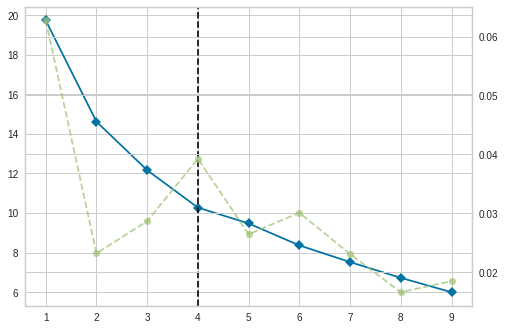

In [26]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (1,10))
visualizer.fit(data_scale)

In [27]:
model_k4 = KMeans(n_clusters = 4, random_state = 10)
model_k4.fit(data_scale)

X['cluster_k4'] = np.NaN
X['cluster_k4'] = model_k4.labels_

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
model_k3 = KMeans(n_clusters = 3, random_state = 10)
model_k3.fit(data_scale)

X['cluster_k3'] = np.NaN
X['cluster_k3'] = model_k3.labels_

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [36]:
X

,age,weight,shoulder_height,neck_size,back_length,chest_size,exercise,BCS,day_cal,cal_diff,cluster,cluster_k3
2,12.0,3.50,22.0,20.0,30.0,32.0,1,5,1440.0,1225.053529,0,2
6,5.0,4.40,28.0,26.0,30.0,36.0,2,5,1320.0,894.678298,3,0
121,12.0,5.00,25.0,27.0,29.0,39.0,1,5,507.0,226.129072,0,2
166,2.0,3.15,22.0,26.0,30.0,29.0,3,5,600.0,268.974880,3,0
182,14.0,3.50,29.0,20.0,29.0,40.0,1,2,301.2,86.253529,0,2
203,11.0,7.50,25.0,25.0,32.0,45.0,2,6,1920.0,1412.408933,2,1
231,12.0,7.00,26.0,26.0,35.0,44.0,1,5,480.0,118.504566,1,1
242,6.0,5.80,27.0,29.0,30.0,46.0,1,6,780.0,256.762297,1,1
252,7.0,4.40,24.0,22.0,34.0,35.0,1,6,1170.0,744.678298,0,2
254,6.0,3.90,22.0,24.0,22.0,39.0,1,5,600.0,211.468271,0,2


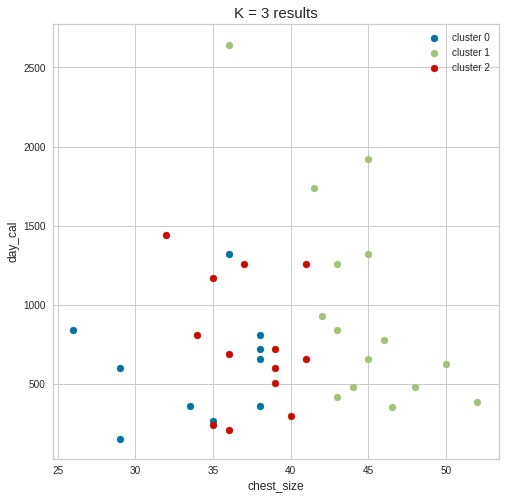

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k = 3
for i in range(k):
    plt.scatter(X.loc[X['cluster_k3'] == i, 'chest_size'],
                X.loc[X['cluster_k3'] == i, 'day_cal'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('chest_size', size = 12)
plt.ylabel('day_cal', size = 12)
plt.show()

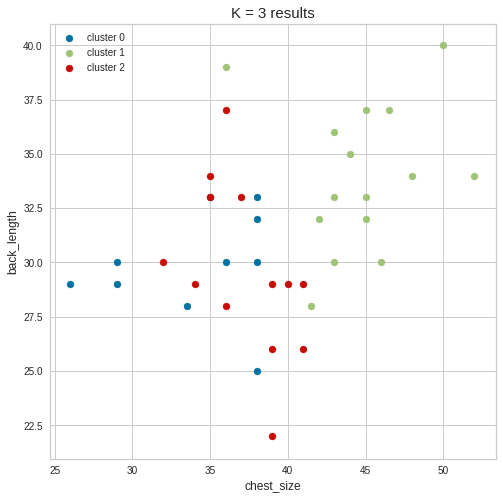

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k = 3
for i in range(k):
    plt.scatter(X.loc[X['cluster_k3'] == i, 'chest_size'],
                X.loc[X['cluster_k3'] == i, 'back_length'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('chest_size', size = 12)
plt.ylabel('back_length', size = 12)
plt.show()

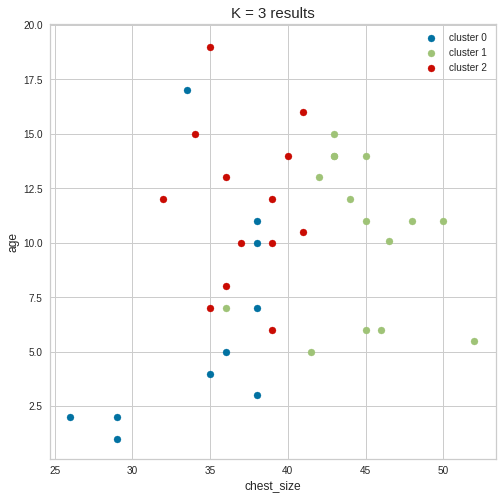

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k = 3
for i in range(k):
    plt.scatter(X.loc[X['cluster_k3'] == i, 'chest_size'],
                X.loc[X['cluster_k3'] == i, 'age'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('chest_size', size = 12)
plt.ylabel('age', size = 12)
plt.show()

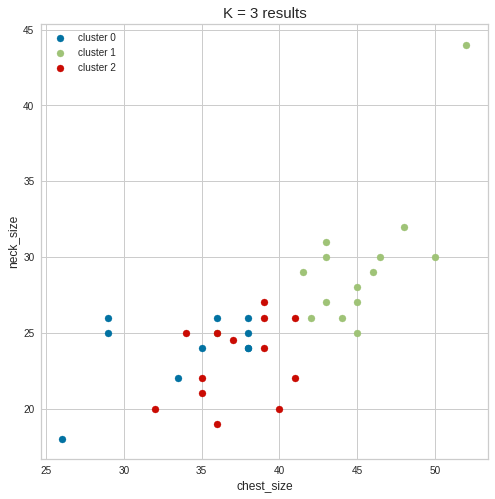

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k = 3
for i in range(k):
    plt.scatter(X.loc[X['cluster_k3'] == i, 'chest_size'],
                X.loc[X['cluster_k3'] == i, 'neck_size'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('chest_size', size = 12)
plt.ylabel('neck_size', size = 12)
plt.show()

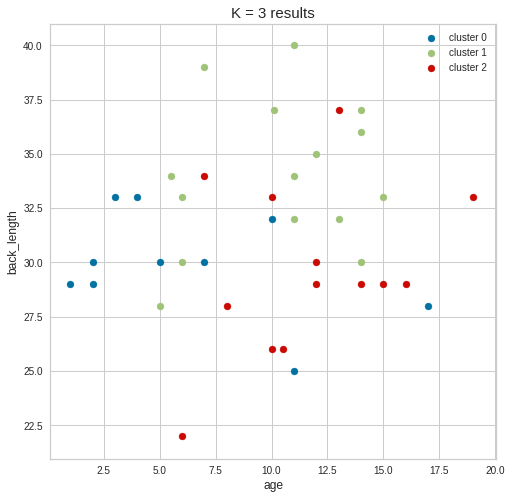

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k = 3
for i in range(k):
    plt.scatter(X.loc[X['cluster_k3'] == i, 'age'],
                X.loc[X['cluster_k3'] == i, 'back_length'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('age', size = 12)
plt.ylabel('back_length', size = 12)
plt.show()

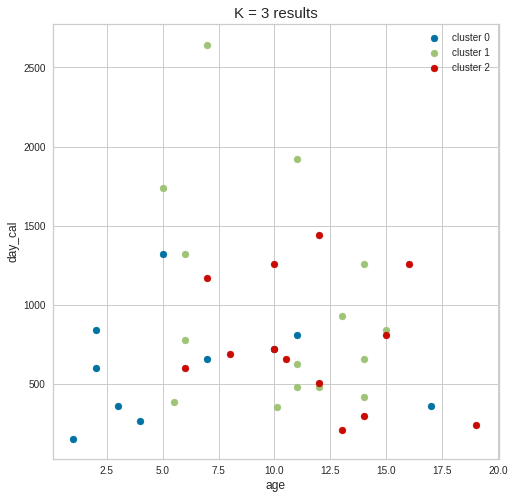

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k = 3
for i in range(k):
    plt.scatter(X.loc[X['cluster_k3'] == i, 'age'],
                X.loc[X['cluster_k3'] == i, 'day_cal'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('age', size = 12)
plt.ylabel('day_cal', size = 12)
plt.show()

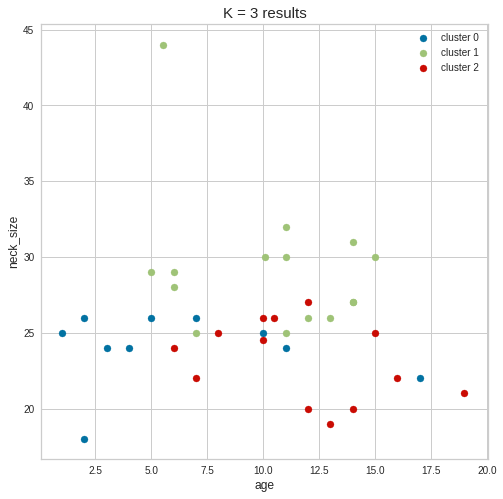

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k = 3
for i in range(k):
    plt.scatter(X.loc[X['cluster_k3'] == i, 'age'],
                X.loc[X['cluster_k3'] == i, 'neck_size'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('age', size = 12)
plt.ylabel('neck_size', size = 12)
plt.show()

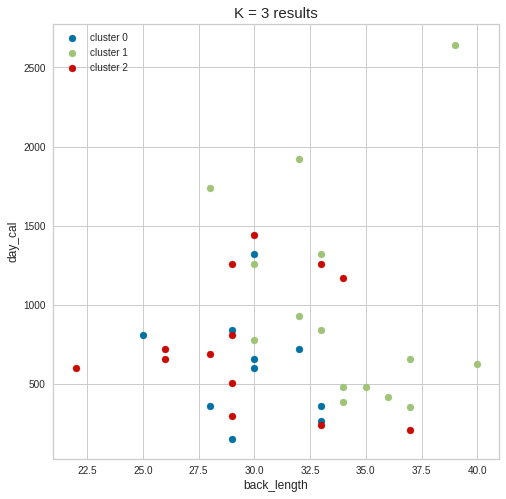

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k = 3
for i in range(k):
    plt.scatter(X.loc[X['cluster_k3'] == i, 'back_length'],
                X.loc[X['cluster_k3'] == i, 'day_cal'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('back_length', size = 12)
plt.ylabel('day_cal', size = 12)
plt.show()

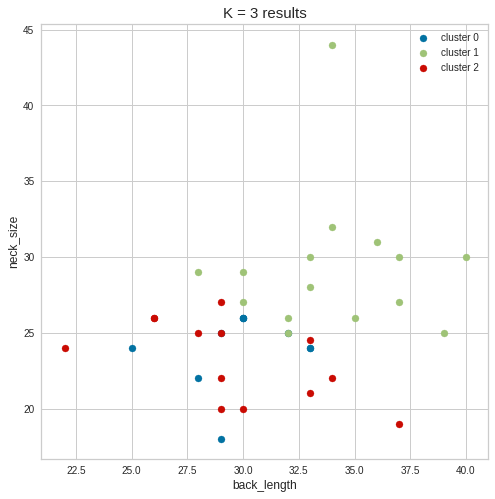

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k = 3
for i in range(k):
    plt.scatter(X.loc[X['cluster_k3'] == i, 'back_length'],
                X.loc[X['cluster_k3'] == i, 'neck_size'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('back_length', size = 12)
plt.ylabel('neck_size', size = 12)
plt.show()

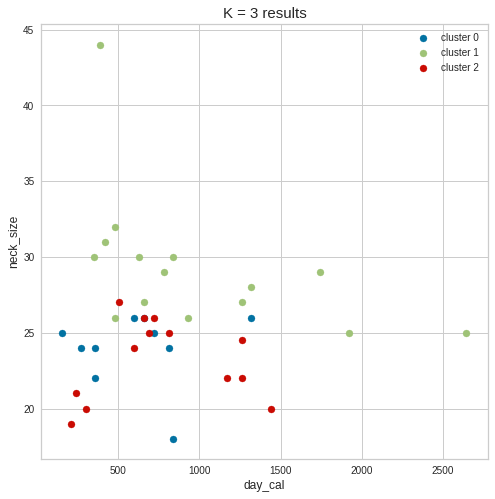

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k = 3
for i in range(k):
    plt.scatter(X.loc[X['cluster_k3'] == i, 'day_cal'],
                X.loc[X['cluster_k3'] == i, 'neck_size'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('day_cal', size = 12)
plt.ylabel('neck_size', size = 12)
plt.show()

In [52]:
X.groupby('cluster_k3')['BCS'].value_counts()

cluster_k3  BCS
0           5       6
            4       2
            3       1
            6       1
1           6      10
            5       3
            7       2
2           5       8
            6       3
            2       1
            4       1
Name: BCS, dtype: int64

/home/jh20/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


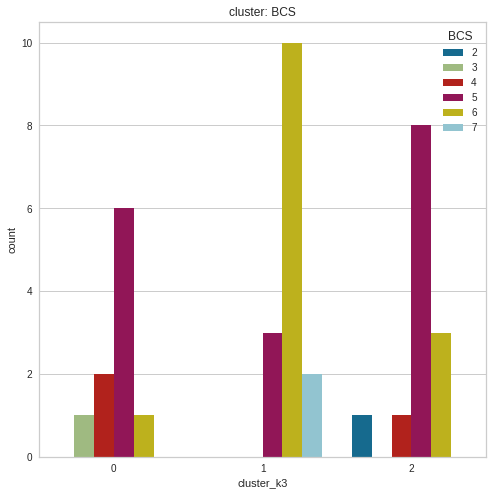

In [73]:
import seaborn as sns
plt.figure(figsize = (8 ,8))
sns.countplot('cluster_k3', hue = 'BCS', data = X)
plt.title('cluster: BCS')
plt.show()